In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input/"))
# Any results you write to the current directory are saved as output.

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit, 

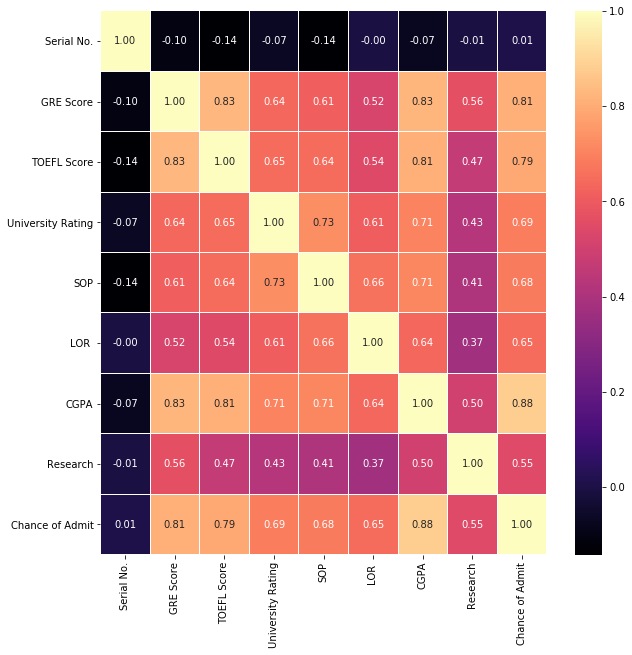

In [2]:
df = pd.read_csv("../input/Admission_Predict_Ver1.1.csv",sep = ",")
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")  
# visualize training data columns and their data types
df.head()
# visualize correlation between columns
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()
# from the figure it can be seen:
# The 3 most important features for admission to the Masters: CGPA, GRE SCORE, and TOEFL SCORE
# The 3 least important features for admission to the Masters: Research, LOR, and SOP

In [3]:
# reading in dataset
df = pd.read_csv("../input/Admission_Predict_Ver1.1.csv",sep = ",")
# rename target column
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
# store serialNo in another variable just in case
serialNo = df["Serial No."].values
# drop serial No. column (unimportant)
df.drop(["Serial No."],axis=1,inplace = True)
# view training data columns again
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# normalization of training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(df)
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[7], scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]
scaled_train_df = pd.DataFrame(scaled_train, columns=df.columns.values)
# define target variable to be predicted
y = df["Chance of Admit"].values
scaled_train_df = df.drop(["Chance of Admit"],axis=1)

Note: median values were scaled by multiplying by 1.5873015873 and adding -0.539683


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#build our model
model = Sequential()
model.add(Dense(14, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [13]:
# define X and y
X = scaled_train_df.values
Y = y

# split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.10,random_state = 42)
# Train the model
model.fit(
    x_train[10:],
    y_train[10:],
    epochs=150, # optimal value from trial and error
    shuffle=True,
    verbose=2
)
# make prediction for first test row
prediction = model.predict(x_test[:1])
ypred_0 = prediction[0][0]
#print('Prediction with scaling - {}',format(ypred_0))
ypred_0 -= added
ypred_0 /= multiplied_by
print("Predicted Chances of Admission  - {}".format(ypred_0))
print("Actual Chances of Admission  - {}".format(y_test[0]))

Epoch 1/150
 - 0s - loss: 0.0441 - mean_squared_error: 0.0441 - mean_absolute_error: 0.1820
Epoch 2/150
 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - mean_absolute_error: 0.0923
Epoch 3/150
 - 0s - loss: 0.0099 - mean_squared_error: 0.0099 - mean_absolute_error: 0.0781
Epoch 4/150
 - 0s - loss: 0.0125 - mean_squared_error: 0.0125 - mean_absolute_error: 0.0893
Epoch 5/150
 - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - mean_absolute_error: 0.0733
Epoch 6/150
 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - mean_absolute_error: 0.0757
Epoch 7/150
 - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0690
Epoch 8/150
 - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0659
Epoch 9/150
 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0670
Epoch 10/150
 - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0708
Epoch 11/150
 - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_

Epoch 90/150
 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - mean_absolute_error: 0.0543
Epoch 91/150
 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - mean_absolute_error: 0.0610
Epoch 92/150
 - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0642
Epoch 93/150
 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - mean_absolute_error: 0.0558
Epoch 94/150
 - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0727
Epoch 95/150
 - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0757
Epoch 96/150
 - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - mean_absolute_error: 0.0859
Epoch 97/150
 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0638
Epoch 98/150
 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - mean_absolute_error: 0.0603
Epoch 99/150
 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - mean_absolute_error: 0.0596
Epoch 100/150
 - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - mean

In [15]:
# evaluating model
from sklearn.metrics import r2_score
# predict on whole test set
y_test_preds = model.predict(x_test)
print("r_square score (test dataset): ", r2_score(y_test,y_test_preds))
# predict on whole train set
y_train_pred = model.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_train_pred))

r_square score (test dataset):  0.7574545564272783
r_square score (train dataset):  0.7583303264262046
